Code to visualize acceptance rates and submissions over time.

Data from https://github.com/lixin4ever/Conference-Acceptance-Rate.

Visualization code by [Chandan Singh](https://github.com/csinva).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from os.path import join as oj
import matplotlib as mpl

# Read in and format the data

In [2]:
tabs = pd.read_html(
    'https://github.com/lixin4ever/Conference-Acceptance-Rate/blob/master/README.md')


def clean_acc_rate(acc_rate_str):
    if '?' in acc_rate_str:
        return np.nan
    acc_rate_str = (
        acc_rate_str.replace('~28', '28')
        .replace('~47', '47')
        .replace('-', '')  # np.nan)
    )
    try:
        return float(acc_rate_str)
    except:
        return np.nan


dfs = []
for t0 in tabs:
    t0['confname'] = t0['Conference'].str.split("'").str[0]
    t0['year'] = (
        t0['Conference'].str.split("'").str[1]
        .str.split(" ").str[0].astype(int)
    )
    t0['acc_rate'] = t0['Long Paper'].str.split("%").str[0]
    t0['acc_rate'] = t0['acc_rate'].apply(clean_acc_rate).astype(float)
    t0['submissions'] = (
        t0['Long Paper'].str.split("/")
        .str[1].str.split(')')
        .str[0].replace('1000+', '1000')
        .replace('?', np.nan)
        .replace('NaN', np.nan)
        .astype(float)
    )
    dfs.append(t0)
df = pd.concat(dfs)

df = df.dropna()  # drop rows with missing vals
df = df[df['year'] <= 23]  # drop year too high
df = df[df['year'] >= 14]  # drop year too low

# Make the plot

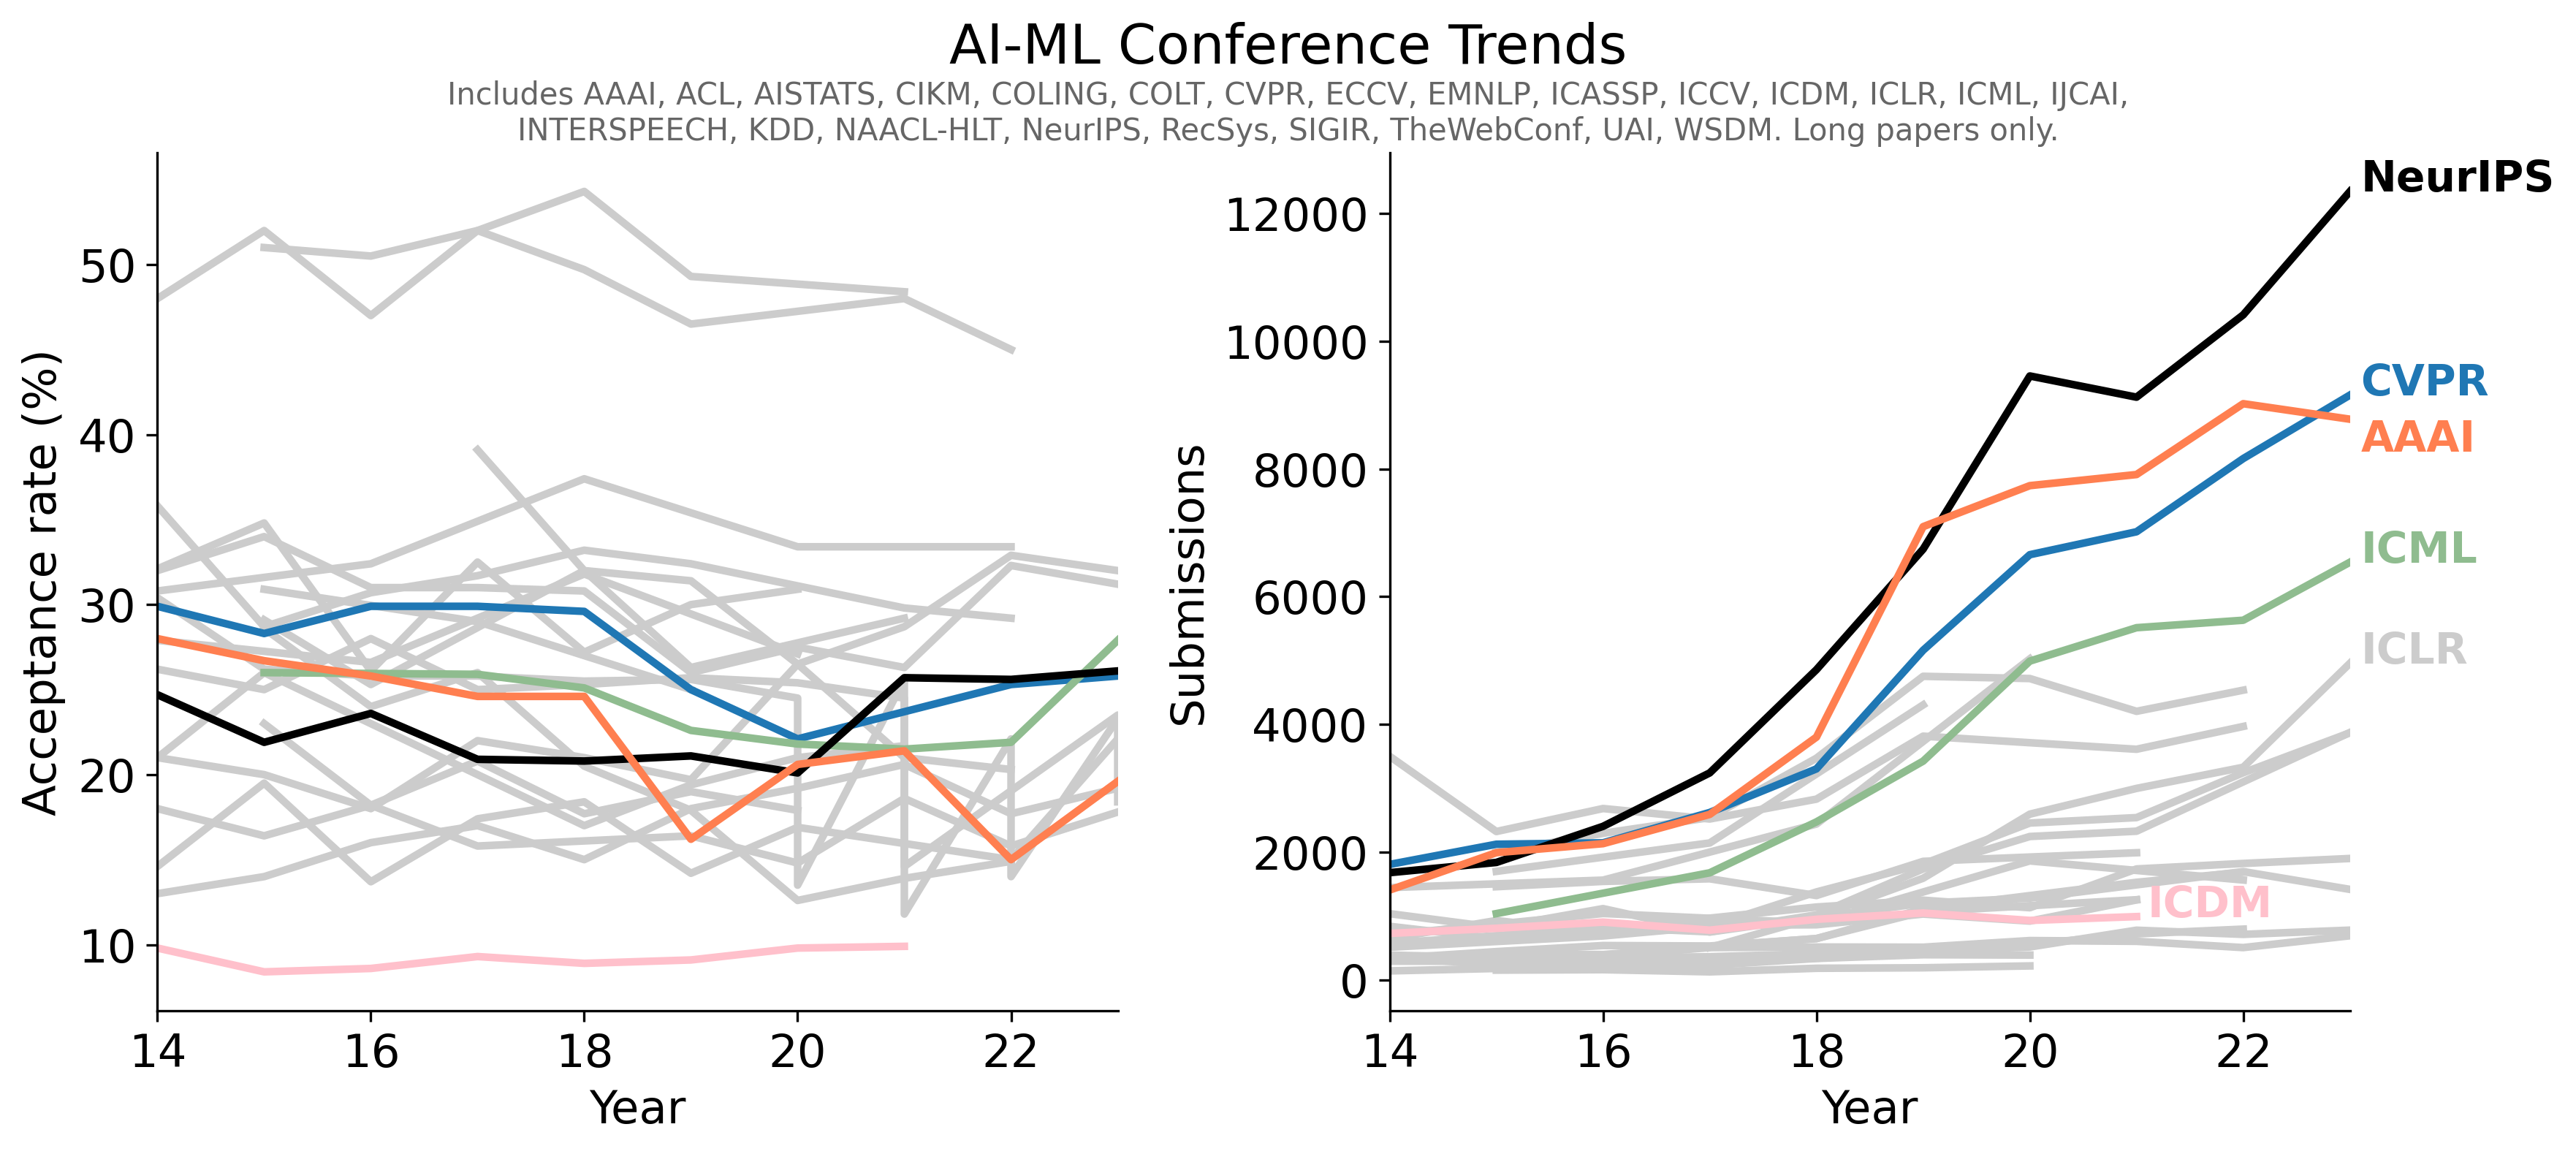

In [20]:
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['figure.autolayout'] = True
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['axes.labelsize'] = 15
mpl.rcParams['font.size'] = 15
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15
plt.figure(figsize=(12, 5), dpi=300, facecolor='w')


colors = ["black", "C0", "coral", "darkseagreen", "#cccccc", 'pink']
COLORS_TO_HIGHLIGHT = {
    'NeurIPS': colors[0],
    'CVPR': colors[1],
    'AAAI': colors[2],
    'ICML': colors[3],
    'ICLR': colors[4],
    'ICDM': colors[5],
}


def get_color(confname):
    return COLORS_TO_HIGHLIGHT.get(confname, '#cccccc')


def confname_is_special(confname):
    return confname in COLORS_TO_HIGHLIGHT


# acc rate plot
plt.subplot(1, 2, 1)
for confname in df.confname.unique():
    conf = df[df.confname == confname]
    plt.plot(conf.year, conf.acc_rate, label=confname,
             color=get_color(confname), lw=2.5, zorder=int(confname_is_special(confname)))
plt.xlim((14, 23))
plt.xlabel('Year')
plt.ylabel('Acceptance rate (%)')

# submissions plot
plt.subplot(1, 2, 2)
for confname in df.confname.unique():
    conf = df[df.confname == confname]
    plt.plot(conf.year, conf.submissions, label=confname, color=get_color(confname), lw=2.5,
             zorder=int(confname_is_special(confname)))
    if confname_is_special(confname):
        x = conf.year.max() + 0.1
        y = conf.submissions.values[-1]
        if confname == 'AAAI':
            y -= 500
        plt.text(x, y, confname,
                 color=get_color(confname), fontsize=14, fontweight='heavy')
plt.xlim((14, 23))
plt.xlabel('Year')
plt.ylabel('Submissions')

# add titles
plt.subplots_adjust(bottom=0.1, top=0.40)
plt.figtext(.5, 1.02, 'AI-ML Conference Trends', fontsize=18, ha='center')
# ', '.join(sorted(df.confname.unique()))
plt.figtext(.5, .95, 'Includes ' + 'AAAI, ACL, AISTATS, CIKM, COLING, COLT, CVPR, ECCV, EMNLP, ICASSP, ICCV, \
ICDM, ICLR, ICML, IJCAI,\nINTERSPEECH, KDD, NAACL-HLT, NeurIPS, RecSys, SIGIR, TheWebConf, UAI, WSDM. Long papers only.',
            fontsize=10, ha='center', color='#666666')
plt.tight_layout()
plt.savefig('conference_trends.png', dpi=300, bbox_inches='tight')
plt.show()